In [68]:
# for data analysis
import numpy as np # perform math operations (matrix math)
import pandas as pd 
from pandas import Series, DataFrame

# for plotting charts
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

#for the image display
from IPython.display import Image

#statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats

import os
os.chdir(r"C:\Users\prisc\code\Intro to DA\Final Group Project\Data file")

In [69]:
# Main 3 libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Additional libraries
import matplotlib.pyplot as plt 
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D

In [70]:
df = pd.read_csv("Intelligent_Couponing.csv")

C:\Users\prisc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
#############################
### 2.EDA before cleaning ###
#############################

#Table of Content 

#2.1 Variable Indetification
    #2.1.1 How does my data looks like?
    #2.1.2 Data type & basic statistics (central tendency and spread for continous; count for categorical)
    #2.1.3 How does my variable look like?(predictor & target, continous & categorical, datatypes)
#2.2 Uni-variant Analyisis
    #2.2.1 countinous variable - do we have outliers?
    #2.2.2 categorical variable -what is the distribution of each category?
#2.3 Bi-variant Analysis 
    # my target variable to other categorical variable
    # Chi square test - are there any significate association between the two variables?
#2.4 Correlation

In [72]:
###2.1 Variable Identification ###
#2.1.1 How does my data looks like?
print(df.head())

   customernumber        date  salutation  title  domain datecreated  \
0           41191  2008-12-01           0      0       9  2008-12-01   
1           38860  2008-12-16           1      0       4  2008-12-16   
2           61917  2008-08-19           0      0      12  2008-08-19   
3           40647  2008-06-16           1      0       8  2008-06-16   
4            1347  2008-08-08           0      0       1  2008-08-08   

   newsletter  model  paymenttype  deliverytype    ...     w2 w3  w4 w5  w6  \
0           0      2            2             0    ...      0  0   0  0   0   
1           0      1            1             1    ...      0  0   0  0   0   
2           0      1            0             0    ...      0  0   0  0   0   
3           0      1            0             0    ...      0  0   0  2   0   
4           0      1            1             1    ...      2  0   0  0   0   

   w7  w8  w9  w10  target90  
0   0   0   0    0         0  
1   0   0   0    0         0  

In [73]:
#2.1.2 Data Types & Basic Description 
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32428 entries, 0 to 32427
Data columns (total 38 columns):
customernumber          32428 non-null int64
date                    32428 non-null object
salutation              32428 non-null int64
title                   32428 non-null int64
domain                  32428 non-null int64
datecreated             32428 non-null object
newsletter              32428 non-null int64
model                   32428 non-null int64
paymenttype             32428 non-null int64
deliverytype            32428 non-null int64
invoicepostcode         32428 non-null int64
delivpostcode           1392 non-null object
voucher                 32428 non-null int64
advertisingdatacode     6523 non-null object
case                    32428 non-null int64
numberitems             32428 non-null int64
gift                    32428 non-null int64
entry                   32428 non-null int64
points                  32428 non-null int64
shippingcosts           32428 non-

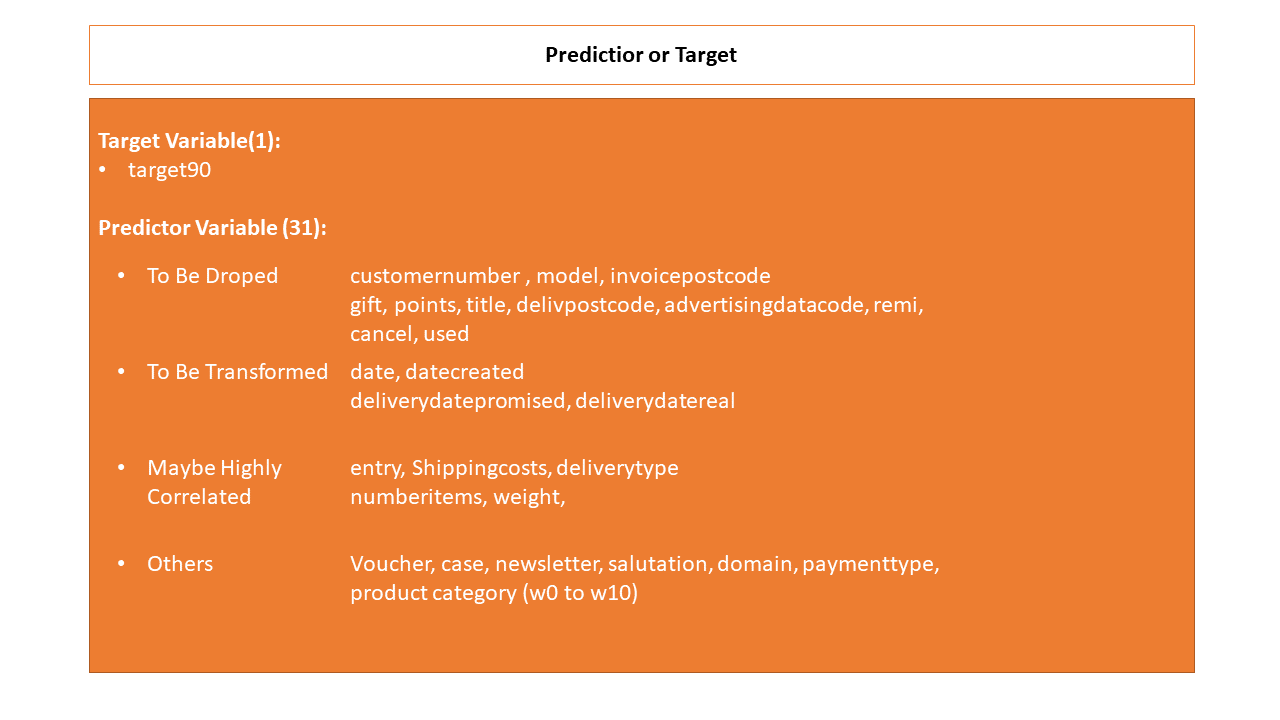

In [74]:
# 2.1.3 How does my variable looks like?
# my predictor variables & target variables 
Image(filename='1.png',width=750, height=750)

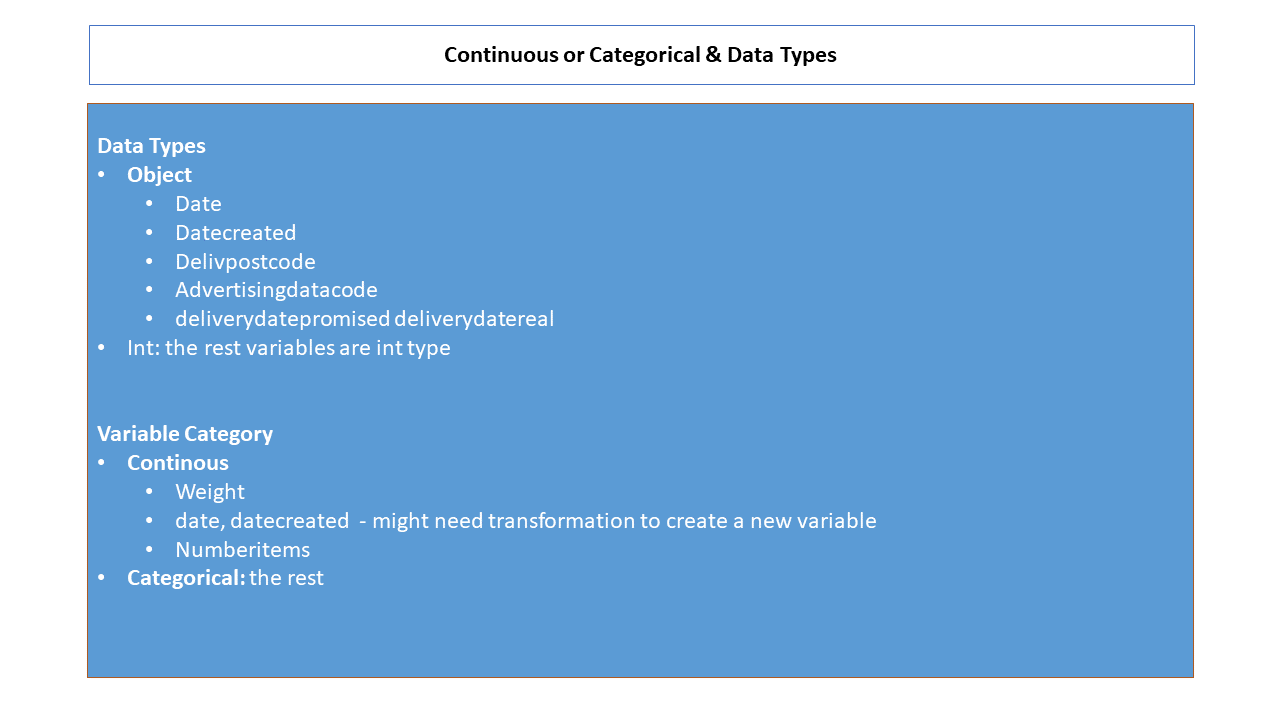

In [75]:
# what are my variable data type and variable category
Image(filename='2.png',width=750, height=750)

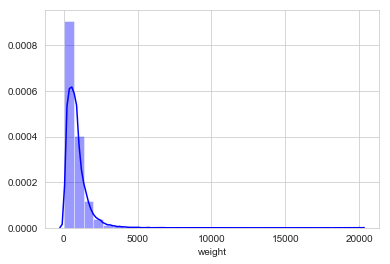

In [76]:
###2.2 Uni-Variant Analysis ###
#2.2.1 Continuous Variable
# weight
sns.distplot(df['weight'], bins = 30, color = "blue")

#Question: why we have weight which equals to 0 ?

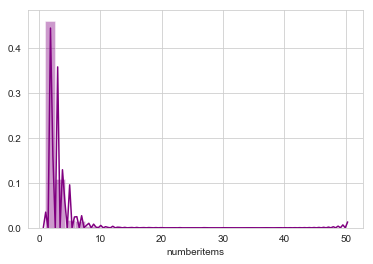

In [77]:
# no.of items
sns.distplot(df['numberitems'], bins = 30, color = "purple")

Data Distribution Analysis


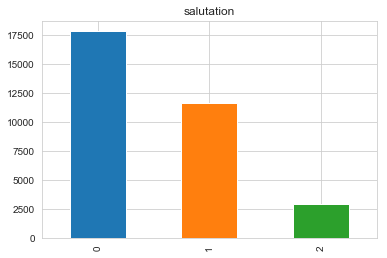

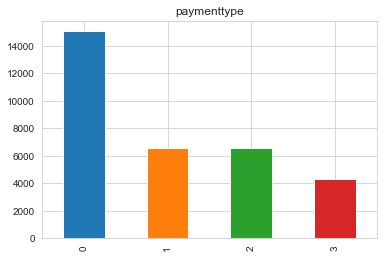

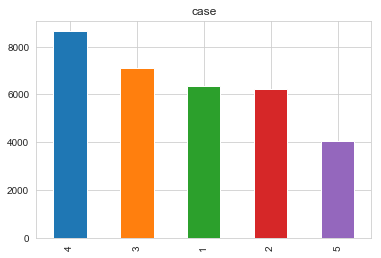

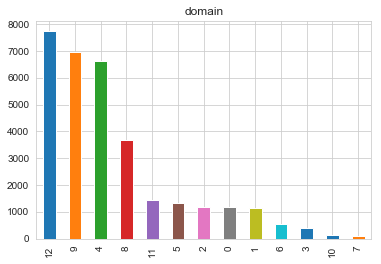

In [84]:
#2.2.2 Categorical Data - understand the distribution of each category
#data which has more than one categories - count
variables = ['salutation','paymenttype','case','domain']
print("Data Distribution Analysis")
for v in variables:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

Data Distribution Analysis


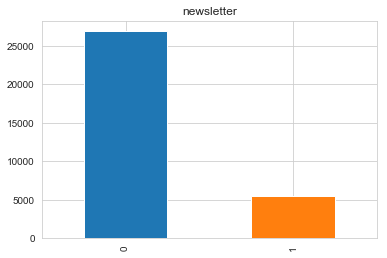

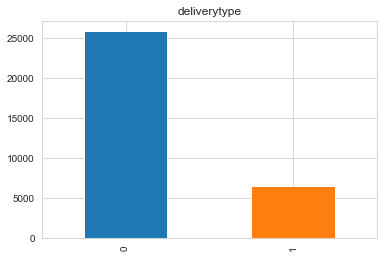

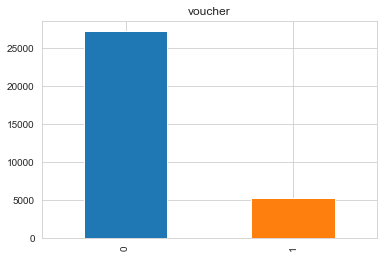

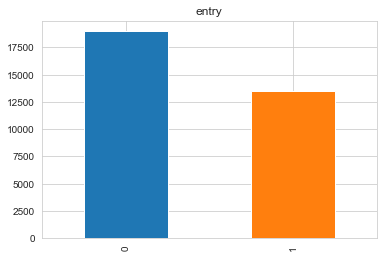

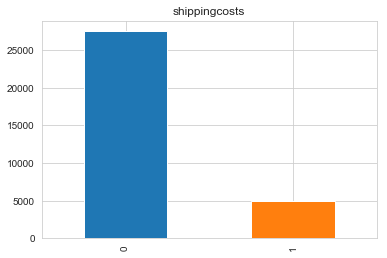

In [85]:
#data which has either yes or no entry
variables = ['newsletter','deliverytype','voucher','entry','shippingcosts']
print("Data Distribution Analysis")
for v in variables:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

In [45]:
### 2.3 Bi-Variant Analysis ###
## Target 90 against other Catgorical Variables
## Chi-squred to test aossiciation(if knowing A will help you to predict B)

(33.61449988992723,
 5.020004343733141e-08,
 2,
 array([[14511.09164919,  3328.90835081],
        [ 9446.85080794,  2167.14919206],
        [ 2419.05754286,   554.94245714]]))

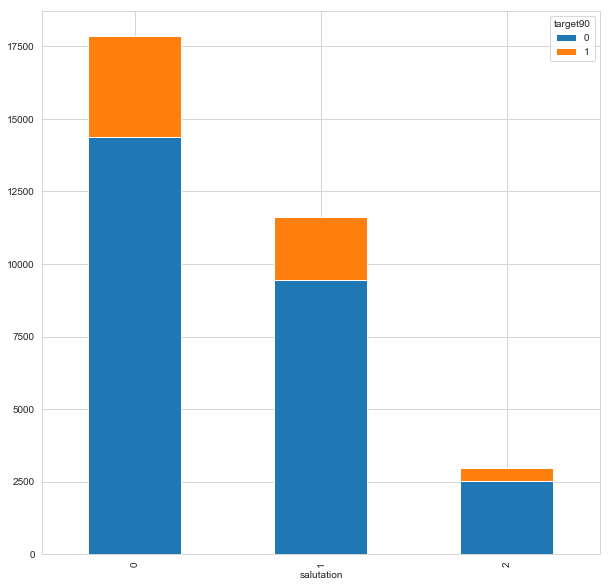

In [14]:
##2.3.1 Target90 against salutation (female, male or company)
df_group1 = df.groupby(['target90','salutation'])['target90'].count().unstack('target90').fillna(99)
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )
df_group1

# null-hypothesis: they are indenpent
# chi-square test for the independance between target90 and gender
scipy.stats.chi2_contingency(df_group1)

# results shows that they are dependent

(222.88637220493683,
 2.1223178094999486e-50,
 1,
 array([[21906.54261749,  5025.45738251],
        [ 4470.45738251,  1025.54261749]]))

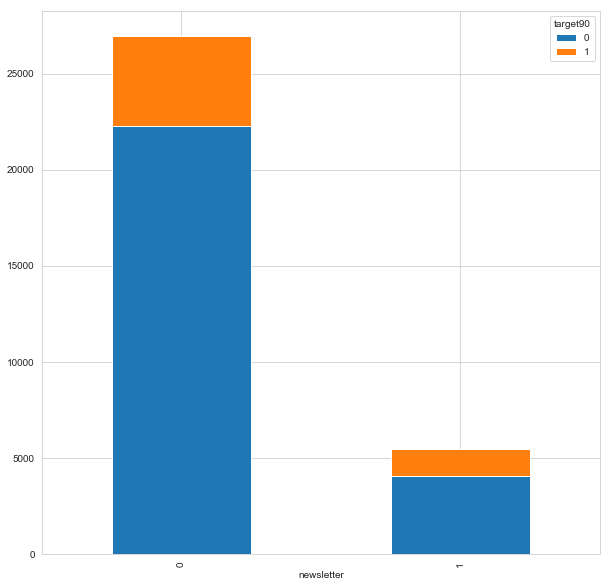

In [15]:
#2.3.2 Target90 against newsletter
df_group1 = df.groupby(['target90','newsletter'])['target90'].count().unstack('target90').fillna(99)
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )
df_group1

# chi-square test for the independance between target90 and gender
scipy.stats.chi2_contingency(df_group1)

#result: dependent

(17.01459045793761,
 0.14904928951059448,
 12,
 array([[ 954.12054397,  218.87945603],
        [ 926.46487603,  212.53512397],
        [ 972.82878993,  223.17121007],
        [ 309.90616134,   71.09383866],
        [5390.41504256, 1236.58495744],
        [1066.37001974,  244.62998026],
        [ 445.74429505,  102.25570495],
        [  91.9144258 ,   21.0855742 ],
        [3004.70698162,  689.29301838],
        [5655.58409399, 1297.41590601],
        [ 111.43607376,   25.56392624],
        [1156.65764154,  265.34235846],
        [6290.85105464, 1443.14894536]]))

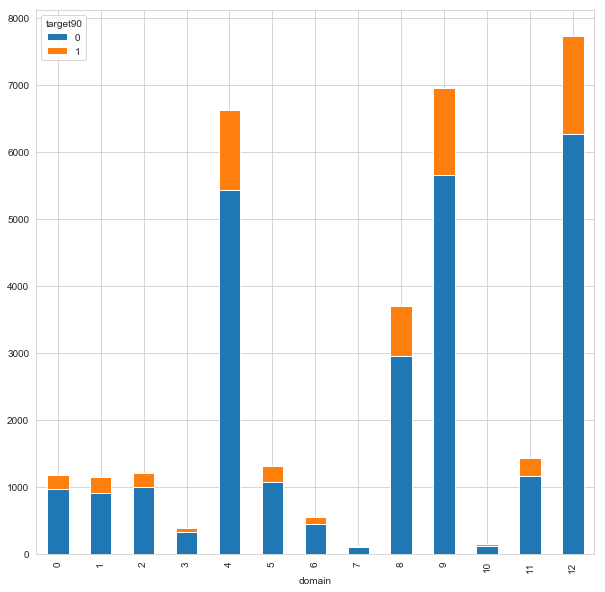

In [16]:
#2.3.3 Target90 against domain (assumptio: domain may be an indicator that if you are a sophisticated user)
df_group1 = df.groupby(['target90','domain'])['target90'].count().unstack('target90').fillna(99)
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )
plt.legend
df_group1

scipy.stats.chi2_contingency(df_group1)
# result: not dependent - drop this column 

(123.93478075493861,
 1.0962351516524858e-26,
 3,
 array([[12252.27429999,  2810.72570001],
        [ 5326.96968669,  1222.03031331],
        [ 5317.20886271,  1219.79113729],
        [ 3480.54715061,   798.45284939]]))

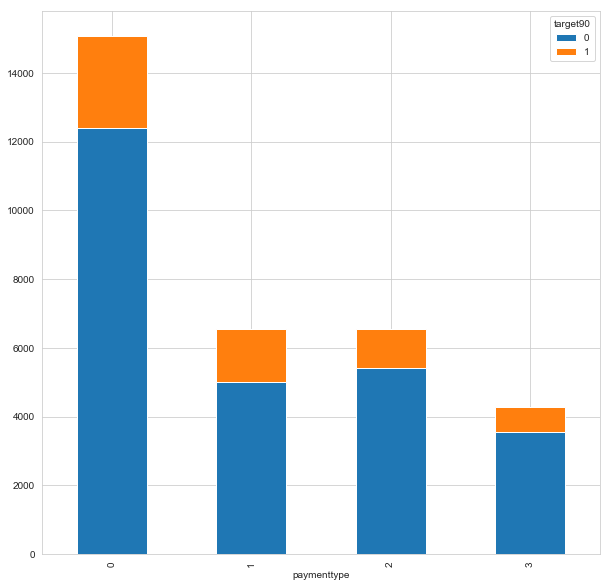

In [17]:
#2.3.4 Target90 against payment type
df_group1 = df.groupby(['target90','paymenttype'])['target90'].count().unstack('target90').fillna(99)
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )
df_group1

scipy.stats.chi2_contingency(df_group1)

# result: dependent

(122.29734581355343,
 1.9870967548672947e-28,
 1,
 array([[21050.03031331,  4828.96968669],
        [ 5326.96968669,  1222.03031331]]))

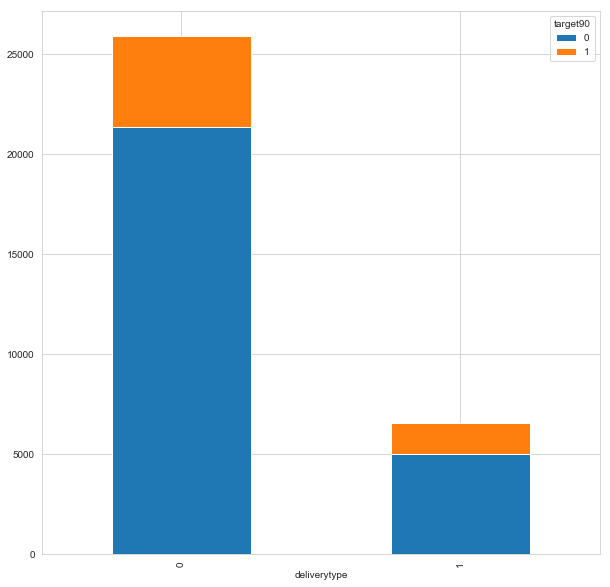

(27.632049511170166,
 1.4672737696166663e-07,
 1,
 array([[22103.38590107,  5070.61409893],
        [ 4273.61409893,   980.38590107]]))

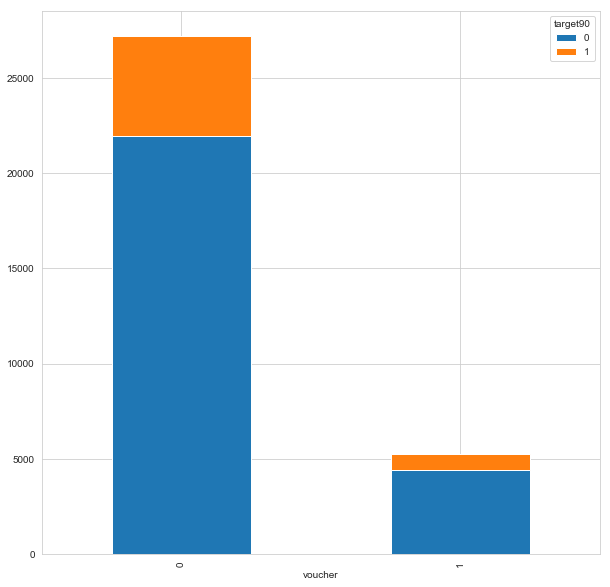

In [81]:
# 2.3.6 target90 againset voucher (if previous vouncher cashed or not)
df_group1 = df.groupby(['target90','voucher'])['target90'].count().unstack('target90').fillna(99)
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )
df_group1

scipy.stats.chi2_contingency(df_group1)

#result: dependent

(97.77207233228714,
 2.9311851256217804e-20,
 4,
 array([[5164.28928704, 1184.71071296],
        [5067.49444924, 1162.50555076],
        [5795.4892377 , 1329.5107623 ],
        [7034.30048107, 1613.69951893],
        [3315.42654496,  760.57345504]]))

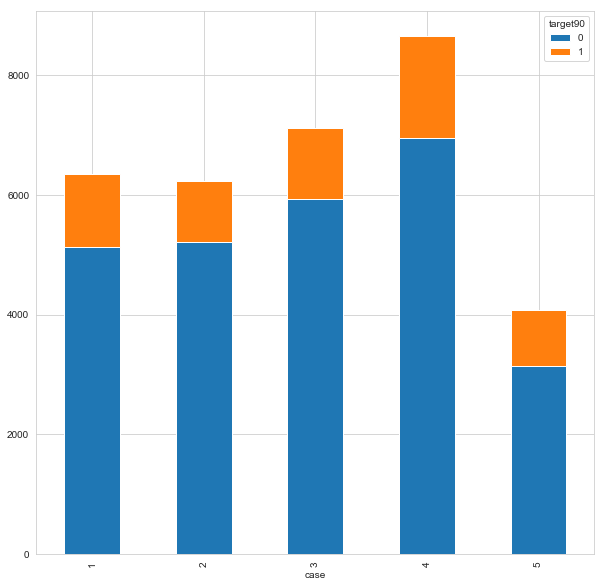

In [86]:
# 2.3.7 target90 againset case
df_group1 = df.groupby(['target90','case'])['target90'].count().unstack('target90').fillna(99)
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )
df_group1

scipy.stats.chi2_contingency(df_group1)
# result: dependent

(55.07552842669487,
 1.1598603601574276e-13,
 1,
 array([[15439.99673122,  3542.00326878],
        [10937.00326878,  2508.99673122]]))

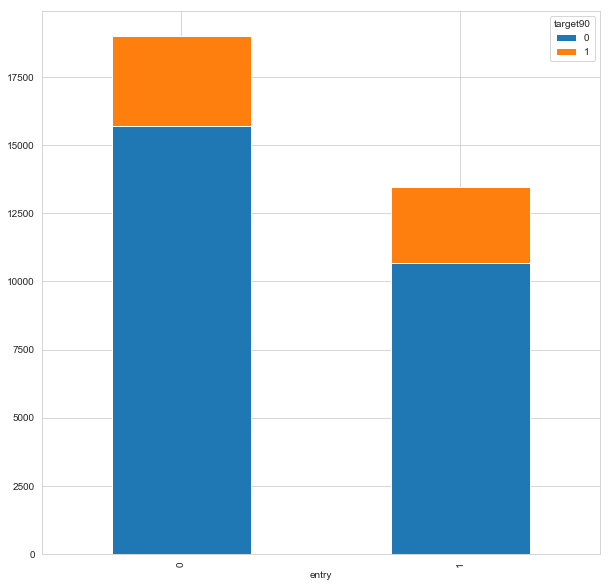

In [22]:
# 2.3.8 target90 against entry
df_group1 = df.groupby(['target90','entry'])['target90'].count().unstack('target90').fillna(99)
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )
df_group1

scipy.stats.chi2_contingency(df_group1)
# result: dependent

(162.47383487966454,
 3.2596449360277816e-37,
 1,
 array([[22404.34464043,  5139.65535957],
        [ 3972.65535957,   911.34464043]]))

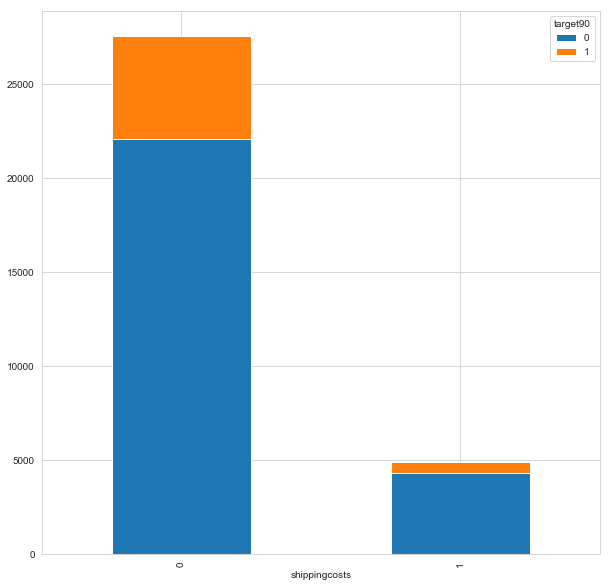

In [92]:
# 2.3.9 target90 against shippingcosts
df_group1 = df.groupby(['target90','shippingcosts'])['target90'].count().unstack('target90').fillna(99)
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )
df_group1

scipy.stats.chi2_contingency(df_group1)
# result: dependent

In [23]:
# Conclunsion (Can my variables predict the target 90?):
# 1. domain and target90 are independent,so our assumption is not right, drop the column
# 2. among all categorical varirable: newsletter, paymenttype, deliverytype, case, voucher, entry, shippingcosts are dependent with the target 90


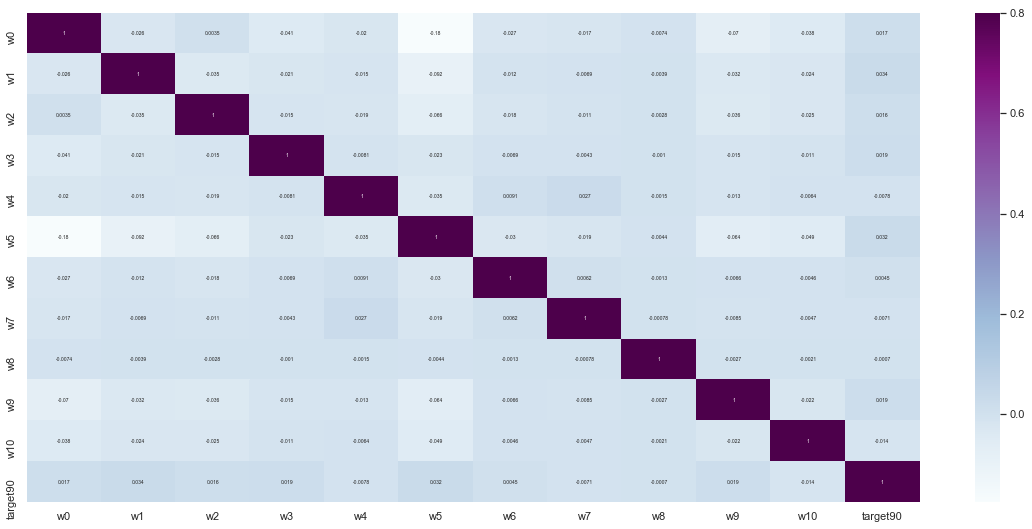

In [108]:
### 2.4 getting the correlation ### 
#correlation of 11 product category and target 90
df_heatmap = df.iloc[:,26:38]
corr = df_heatmap.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 5}, annot=True, cmap = 'BuPu');

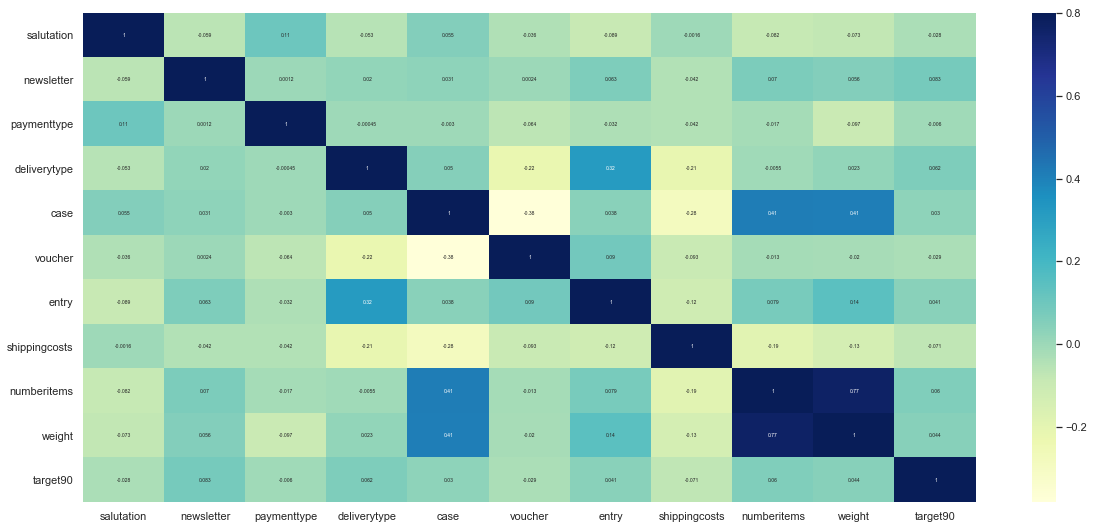

In [109]:
# correlation of other variable and target 90
df_heatmeat2 = df.loc [:,['salutation', 'newsletter', 'paymenttype','deliverytype','case','voucher', 'entry', 'shippingcosts','numberitems', 'weight', 'target90']]
corr = df_heatmeat2.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 5}, annot=True, cmap = "YlGnBu");

In [ ]:
# conclusion from heatmap correlations: 
# The heatmap gives us a visualization of the correlation matix, the correlation between weight & number of item is 0.77, 
# thus, we think they are highly correlcted, we need to remove one

In [ ]:
# limitation: more through consideration of multicolinearity, maybe use PCA to remove features